<a href="https://colab.research.google.com/github/CodeHunterOfficial/DL_20241S/blob/main/Lecture_2_1_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

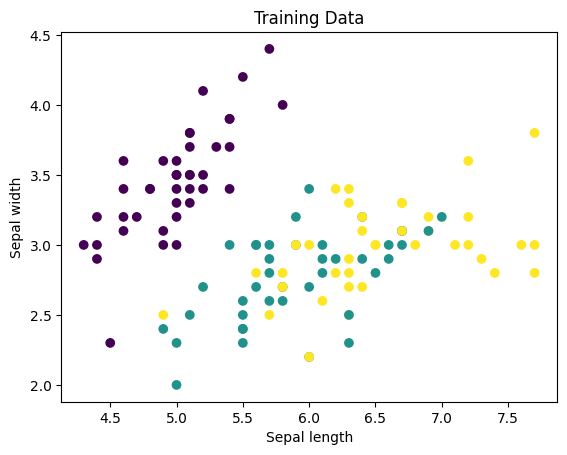

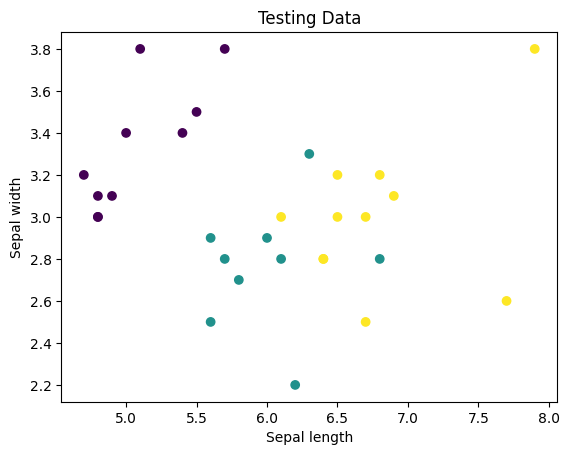

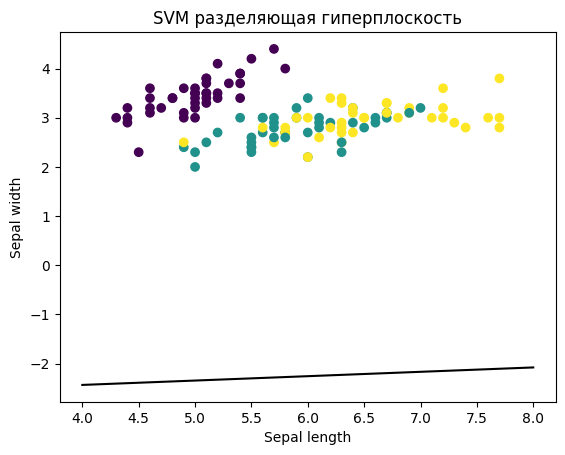

In [2]:
# Импорт необходимых библиотек
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Загрузка датасета ириса
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели SVM
model = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')

# Обучение модели на обучающем наборе
model.fit(X_train, y_train)

# Визуализация обучающих данных
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Training Data')
plt.show()

# Визуализация тестовых данных
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Testing Data')
plt.show()

# Визуализация разделяющей гиперплоскости
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(4, 8)
yy = a * xx - (model.intercept_[0]) / w[1]

plt.plot(xx, yy, 'k-')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('SVM разделяющая гиперплоскость')
plt.show()


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

# Загрузка данных о пассажирах Титаника
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

# Предварительная обработка данных
titanic_data.dropna(subset=['Embarked', 'Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare'], inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})

# Определение признаков и целевой переменной
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = titanic_data['Survived']

# Нормализация признаков
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Разделение данных на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели SVM
model = svm.SVC(kernel='linear', C=1, decision_function_shape='ovr')

# Обучение модели на обучающем наборе
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7482517482517482
Confusion Matrix:
[[68 12]
 [24 39]]


In [19]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from mlxtend.plotting import plot_decision_regions

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Подготовка данных
titanic.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'], inplace=True)
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = titanic['Survived']

# Разделение на категориальные и числовые признаки
categorical_cols = ['Sex', 'Embarked']
numerical_cols = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# Преобразование категориальных признаков с помощью One-Hot Encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)])

X_processed = preprocessor.fit_transform(X)

# Разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.3, random_state=42)

# Обучение модели SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = svm.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели SVM: {:.2f}%".format(accuracy * 100))

Точность модели SVM: 75.23%


In [14]:
# Импорт необходимых библиотек
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic = pd.read_csv(url)

# Подготовка данных
titanic.dropna(subset=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived'], inplace=True)
X = titanic[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
y = titanic['Survived']

# Разделение датасета на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабирование признаков
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Обучение модели SVM
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = svm.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print("Точность модели SVM: {:.2f}%".format(accuracy * 100))


Точность модели SVM: 75.23%
